Aim: Create a single layer neural network to classify the self generated random data.

In [143]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [144]:
epochs = 200
batch_size = 50

In [145]:
samples = 5000

yTrain = (torch.arange(samples,dtype = torch.float32).reshape(-1,1) % 2)

stddev = 0.15

xTrain = torch.randn(samples,2)*stddev + yTrain


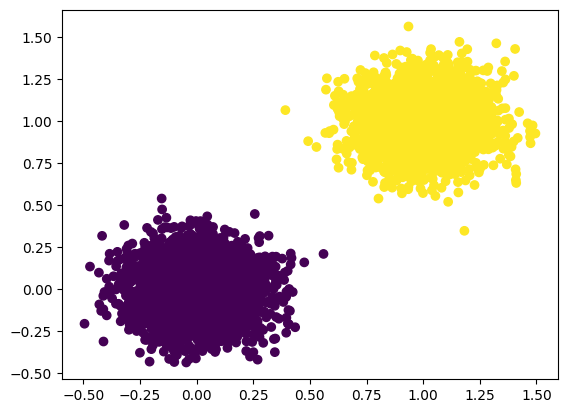

In [146]:
plt.scatter(x = xTrain[:,0],y = xTrain[:,1],c = yTrain.flatten())
plt.show()

In [147]:
#create model architecture
class ANN(nn.Module):
  def __init__(self):
    super().__init__()
    self.activation = nn.Sigmoid()
    self.l1 = nn.Linear(2,1)

  def forward(self,x):
    out1 = self.l1(x)
    act = self.activation(out1)
    return act

In [148]:
model = ANN()
print(model)

ANN(
  (activation): Sigmoid()
  (l1): Linear(in_features=2, out_features=1, bias=True)
)


In [149]:
criteria = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)

In [150]:
lossHist = []
epHist = []

steps = len(xTrain)
for e in range(epochs):
  for i in range(0,steps,batch_size):
    xBatch = xTrain[i:i+batch_size]
    yBatch = yTrain[i:i+batch_size]
    output = model(xBatch)
    loss = criteria(output,yBatch)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  lossHist.append(loss.item())
  epHist.append(e)
  if e % 10 == 0:
    print(f"Epoch: {e} Loss: {loss.item()}")

Epoch: 0 Loss: 0.8325698375701904
Epoch: 10 Loss: 0.42698365449905396
Epoch: 20 Loss: 0.25159212946891785
Epoch: 30 Loss: 0.15343815088272095
Epoch: 40 Loss: 0.09726405888795853
Epoch: 50 Loss: 0.06347279995679855
Epoch: 60 Loss: 0.04227982461452484
Epoch: 70 Loss: 0.02858106605708599
Epoch: 80 Loss: 0.01953681744635105
Epoch: 90 Loss: 0.013474720530211926
Epoch: 100 Loss: 0.009366047568619251
Epoch: 110 Loss: 0.0065574729815125465
Epoch: 120 Loss: 0.00462441286072135
Epoch: 130 Loss: 0.00328640709631145
Epoch: 140 Loss: 0.0023558514658361673
Epoch: 150 Loss: 0.0017059945967048407
Epoch: 160 Loss: 0.0012505007907748222
Epoch: 170 Loss: 0.0009300427045673132
Epoch: 180 Loss: 0.0007035147282294929
Epoch: 190 Loss: 0.0005422608810476959


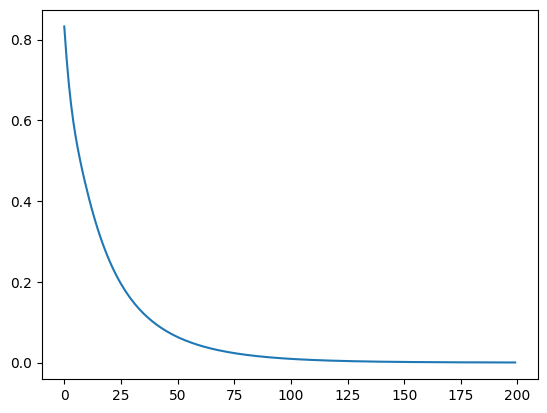

In [151]:
fg = plt.figure()
plt.plot(epHist, lossHist)
fg.show()

In [152]:
#test
with torch.no_grad():
  xTest = torch.tensor([.9,.9])
  xTest = xTest.reshape(-1,2)
  out = model(xTest)
  print(out)
  print(" For input 0.9,0.9\nExpected value: Class 1")
  print(f"Predicted value: Class {round(out.item())}")

tensor([[0.9996]])
 For input 0.9,0.9
Expected value: Class 1
Predicted value: Class 1


In [153]:
#test
with torch.no_grad():
  xTest = torch.tensor([.4,.4])
  xTest = xTest.reshape(-1,2)
  out = model(xTest)
  print(out)
  print(" For input 0.4,0.4\nExpected value: Class 0")
  print(f"Predicted value: Class {round(out.item())}")

tensor([[0.1877]])
 For input 0.4,0.4
Expected value: Class 0
Predicted value: Class 0
